<a href="https://colab.research.google.com/github/kittikhun62/Multivariate/blob/main/Chapter_5_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/community/tutorials/introduction-factor-analysis



In [ ]:
import pandas as pd

In [ ]:
BFI_data = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv')
BFI_data.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


## Factor Analysis'

## Assumptions: 

ในข้อมูล multivariate ที่มีตัวแปร Observe Variables จำนวน n ตัว

มีตัวแปร Factors (Latent Variables) จำนวน k ตัว ที่สามารถอธิบายข้อมูลทั้งหมดได้

โดย k < n

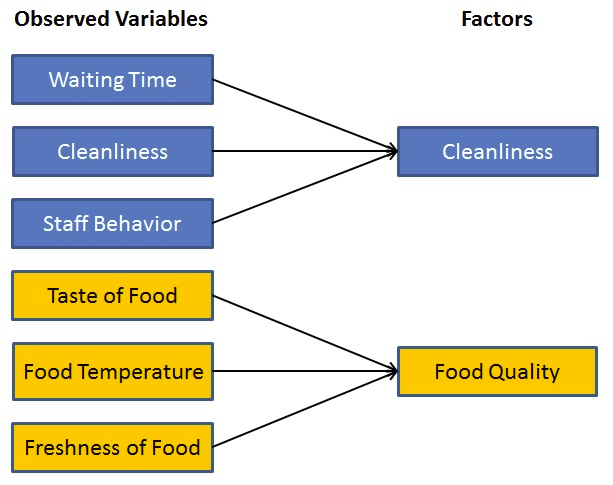



Assumptions ในการทำ Factor Analysis:

* There are no outliers in data.
* Sample size should be greater than the factor.
* There should not be ***perfect multicollinearity***.
* There should not be ***homoscedasticity*** between the variables.

## การทำ Factor Analysis

In [ ]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

ModuleNotFoundError: ignored

แก้ error ```ModuleNotFoundError: No module named 'factor_analyzer'``` โดย https://stackoverflow.com/questions/61830329/modulenotfounderror-no-module-named-factor-analyzer-python-notebook

วิธี install package อื่นๆ

In [ ]:
!pip install factor_analyzer

     |████████████████████████████████| 40kB 2.2MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40383 sha256=f8088250abacd7a7c8f18521a9366d1c5616cfd394eeb96c23e613f6fbe4a9b5
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [ ]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt  # = from matplotlib import pyplot as plt

## Quiz 5 เลือกข้อมูลมาเฉพาะ a1,a2,a3,...,o3,o4,o5 ด้วยคำสั่ง ```.iloc[]```

In [ ]:
BFI_data_dropped = BFI_data.iloc[:,1:-3]
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [ ]:
BFI_data_dropped = BFI_data_dropped.dropna()

In [ ]:
BFI_data_dropped.shape

(2436, 25)

## Bartlett’s test

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value = calculate_bartlett_sphericity(BFI_data_dropped)

chi_square_value, p_value

(18170.966350869243, 0.0)

## Kaiser-Meyer-Olkin (KMO) Test

ถ้าค่า KMO model มีค่ามากกว่า 0.6 แปลว่าข้อมูลเหมาะสมที่นำไปทำ Factor Analysis

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(BFI_data_dropped)

kmo_model

0.8485397221949221

## Factor Analysis

### Import

In [ ]:
from factor_analyzer import FactorAnalyzer

### Define

In [ ]:
fa = FactorAnalyzer(n_factors=20)

## Fit-transform

In [ ]:
data_fa = fa.fit_transform(BFI_data_dropped)

In [ ]:
data_fa.shape

(2436, 20)

## วิธีตัดสินว่าเราจะลดเหลือกี่ dimension (มี factors ทั้งหมดกี่ตัว)

In [ ]:
ev,v = fa.get_eigenvalues()

### ใช้ eigen values

In [ ]:
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

## scree plot

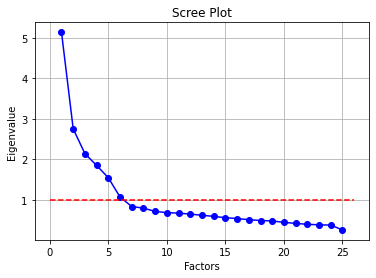

In [ ]:
# Create scree plot using matplotlib
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev,'bo-')
plt.plot([0,BFI_data_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
data_fa[:,:6]

array([[-0.89749661, -0.12809666, -1.22649076,  1.08665889,  0.42476701,
         0.03981611],
       [ 0.33679356, -0.15018138, -0.04332274, -0.10339328,  0.29665648,
        -1.11019718],
       [-0.24521029,  0.80409961,  0.39343377, -0.30106518,  0.82703928,
        -0.2982022 ],
       ...,
       [ 0.38724631, -0.02183587,  1.19616826, -1.19357208,  0.79669501,
        -0.95295109],
       [-0.75695976,  0.94984758,  1.24363484, -1.15230215,  2.2534133 ,
        -1.0218667 ],
       [-2.35583952, -1.49829856,  0.49436981, -1.64734311,  0.94742323,
         0.43462495]])

## รัน Factor Analzer อีกรอบ ด้วย paremeters จำนวน factor เท่ากับ 6

In [ ]:
from factor_analyzer import FactorAnalyzer
fa2 = FactorAnalyzer(n_factors=6)
data_fa = fa2.fit_transform(BFI_data_dropped)

In [ ]:
fa2.loadings_.shape

(25, 6)

#####Plot factor loadings

In [ ]:
from matplotlib import  pyplot as plt
import numpy as np
import matplotlib

# matrix plot
confirmatory

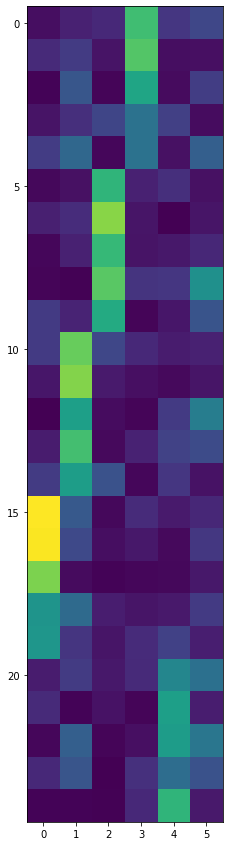

In [ ]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(fa2.loadings_))

## กราฟแท่ง
Exploratory

In [ ]:
BFI_data_dropped.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

<BarContainer object of 25 artists>

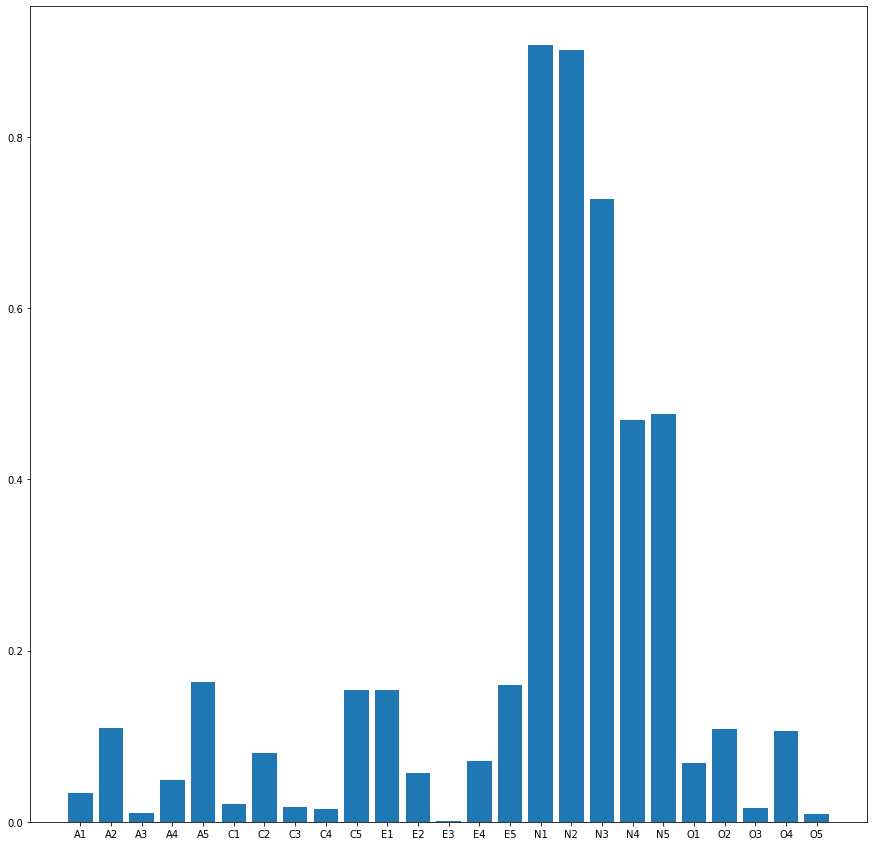

In [ ]:
plt.bar(range(25),np.absolute(fa2.loadings_[:,0]),tick_label=BFI_data_dropped.columns)

# Exam 3

ทำ Factor Analysis ข้อมูล Fifa 2018 
https://drive.google.com/file/d/1UORRKWMb8GCN455eJE_n9MvBHupnSVwv/view?usp=sharing

In [ ]:
ex3 = pd.read_csv('/content/FIFA 2018 Statistics.csv')
ex3

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0,Yes,18.0,Final,No,0,1.0,18.0


In [ ]:
ex3.shape

(128, 27)

In [ ]:
ex3_dropped = ex3.iloc[:,3:20]
ex3_dropped

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0
124,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0
125,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0
126,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0


In [ ]:
ex3_dropped.shape

(128, 17)

### Bartlett’s test
p value เข้าใกล้ 0 ดี

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(ex3_dropped)
chi_square_value, p_value

(1299.3697851171412, 2.713580160466225e-189)

### Kaiser-Meyer-Olkin (KMO) Test
ถ้าค่า KMO model มีค่ามากกว่า 0.6 แปลว่าข้อมูลเหมาะที่นำไปทำ Factor Analysis

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(ex3_dropped)
kmo_model

0.5594556344508279

### Factor Analysis

In [ ]:
# Import
from factor_analyzer import FactorAnalyzer

In [ ]:
# Define
ex3_fa = FactorAnalyzer(n_factors=15)

In [ ]:
# Fit-transfrom
ex3_data_fa = ex3_fa.fit_transform(ex3_dropped)

In [ ]:
ex3_data_fa.shape

(128, 15)

### วิธีตัดสินว่าเราจะลดเหลือกี่ dimension (มี factor ทั้งหมดกี่ตัว)

In [ ]:
ev,v = ex3_fa.get_eigenvalues()
ev

array([4.93533676, 1.66110682, 1.45898601, 1.31857945, 1.27991548,
       1.1607222 , 0.89822418, 0.80740568, 0.78874612, 0.65948826,
       0.56563441, 0.48116939, 0.38549929, 0.29659929, 0.22859409,
       0.06848785, 0.00550471])

### Scree plot

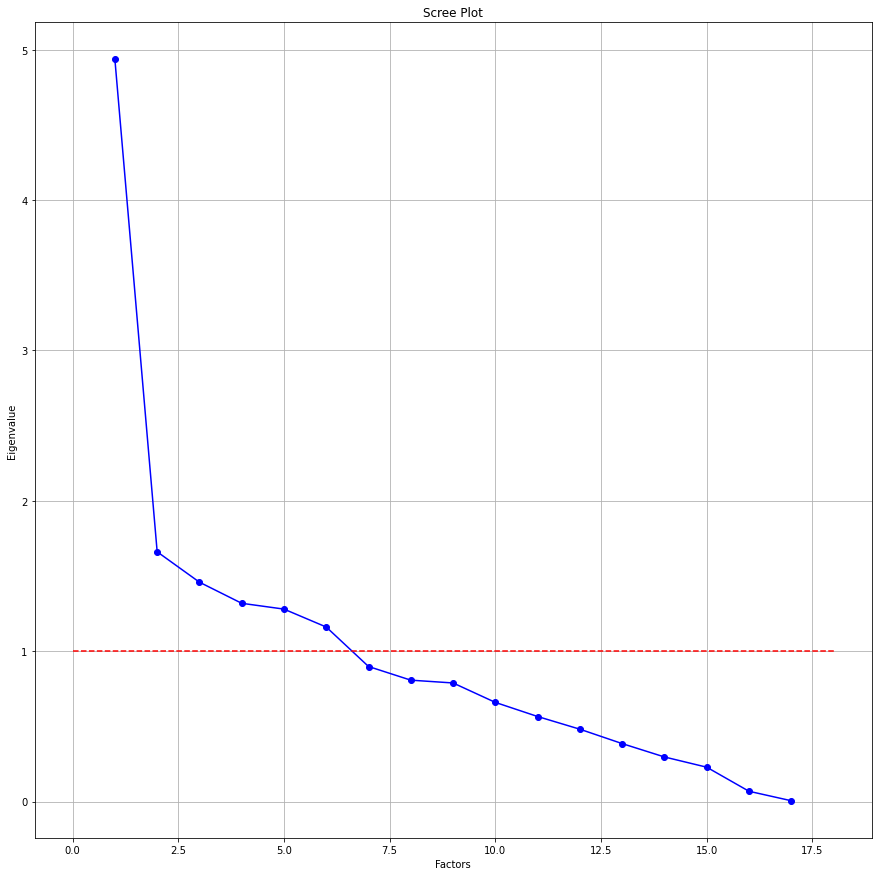

In [ ]:
# Create scree plot using matplotlib
plt.plot(range(1,ex3_dropped.shape[1]+1),ev,'bo-')
plt.plot([0,ex3_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
ex3_data_fa[:,:6]

array([[-9.87264718e-01,  5.85214391e-01,  2.88554202e+00,
         1.56007911e+00, -1.32889516e-01,  2.02526239e-01],
       [ 7.69539758e-01, -6.57955412e-01, -1.09700784e+00,
        -6.02790220e-01, -1.97303773e-01,  1.77345748e-01],
       [-5.93367136e-01,  2.04640836e-01, -8.70822110e-01,
        -2.99370826e-01, -4.02323792e-01, -1.44137697e-01],
       [ 7.81571398e-01,  1.83295212e-01, -2.40837404e-01,
        -1.53932622e+00,  5.72105772e-02, -3.18712453e-02],
       [ 8.46713358e-01, -1.32218775e+00, -7.07269735e-01,
         1.55378817e+00, -5.96329009e-01,  7.97477572e-02],
       [-1.41234443e+00, -1.10664565e+00, -1.98143005e-01,
         3.54321582e-01,  2.00428448e+00, -5.94095836e-01],
       [-8.41889574e-01, -4.38529476e-01,  1.14439194e+00,
        -3.08956436e-01,  2.00398356e+00, -6.20291468e-02],
       [ 1.36049369e+00,  6.14514377e-02,  1.26777973e+00,
        -9.59015616e-01,  1.33582270e+00,  1.41153516e-01],
       [ 1.48479148e-01, -3.50683453e-01,  7.466

### รัน Factor Analyzer อีกรอบ ด้วย paremeters จำนวน factor เท่ากับ 6

In [ ]:
from factor_analyzer import FactorAnalyzer
ex3_fa2 = FactorAnalyzer(n_factors=6)
ex3_data_fa2 = ex3_fa2.fit_transform(ex3_dropped)

In [ ]:
ex3_fa2.loadings_.shape

(17, 6)

# Factor Loading
### Plot factor loadings


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

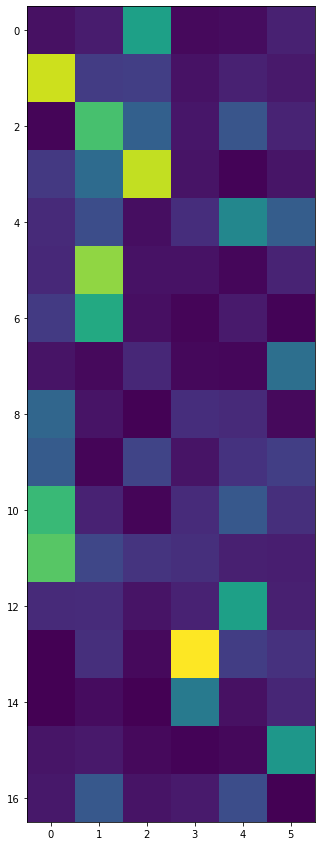

In [ ]:
# martrix plot
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(ex3_fa2.loadings_))

In [ ]:
ex3_dropped.columns

Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red'],
      dtype='object')

<BarContainer object of 17 artists>

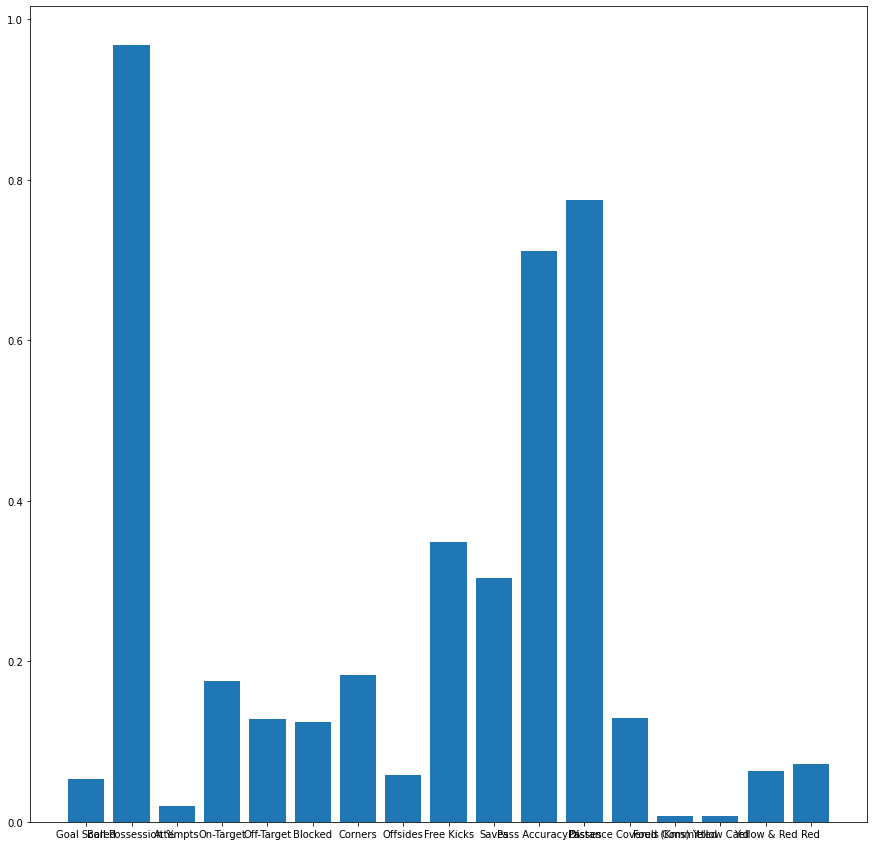

In [ ]:
# กราฟแท่ง
plt.bar(range(17),np.absolute(ex3_fa2.loadings_[:,0]),tick_label=ex3_dropped.columns)

### สรุปผล
ตัวแปรfactor 6 ตัวแปร และสามารถวิเคราะห์องค์ประกอบเชิงสำรวจ (Exporatory Factors Analysis) และ วิเคราะห์องค์ประกอบเชิงยืนยัน (Confirmatory Factors Analysis) 

## Factor loading

In [ ]:
fa.loadings_.shape

(25, 20)